In [1]:
#importing my python files
import equations2D as eqtd
import read_binary as rb

In [2]:
#importing other python files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
#some hyper paramaters with dimensionless variables
vr = 1
ve = 0
v2 = 1
F1 = 1
Ntot = 20

In [26]:
#getting the appropriate variables using the dimensionless
Ntypes=2
q = [0,0]
N,F = eqtd.pars(Ntot,F1,vr,ve,v2)
print(" N = ", N)
print(" F = ",F)

 N =  [10.0, 10.0]
 F =  [[1, 0], [0, 1]]


In [28]:
#loading the data (if it exists)
dat_mac = rb.dataMacroMC(Ntypes,N,q,F)
dat_mic= rb.dataMicroMC(Ntypes,N,q,F)

In [29]:
#getting the data frames
df_mic = dat_mic.df
df_mac = dat_mac.df
df_mic

,time,C
0,0.000000,"[1, 0]"
1,0.000000,"[1, 0]"
2,0.000000,"[1, 0]"
3,0.000000,"[1, 0]"
4,0.000000,"[1, 0]"
...,...,...
1147,21.113261,"[0, 1]"
1148,21.113261,"[0, 1]"
1149,21.113261,"[0, 2]"
1150,21.113261,"[0, 1]"


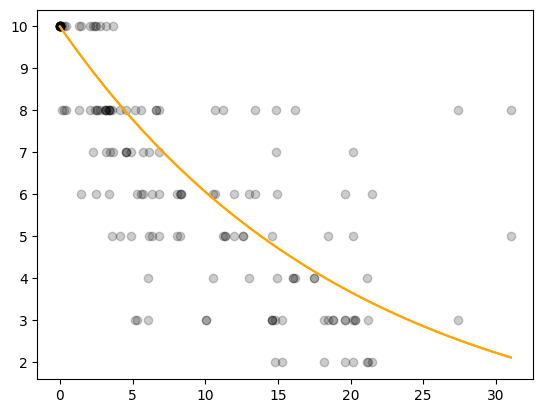

In [32]:
#comparison of monomer dynamics
t_an = np.linspace(0,max(df_mac["time"]))
nm_an = eqtd.mono_dyn(t_an,N,F)

for i in range(Ntypes):
    plt.scatter(df_mac["time"],df_mac["Nm"].apply(lambda x:x[i]),alpha=0.2,color ='black')
    plt.plot(t_an,nm_an[i],color='orange')



In [50]:
#getting the second moment (from micro data)
run=0
dfs_mom2 = [ for run]
d =dat_mic.dfs[run].groupby("time")['C'].apply(list)
print(d)

# index=8
# alpha =0
# beta =0
# mom2 =0
# for di in d[index]:
#     mom2 = mom2 + (di[alpha]*di[beta])
# mom2
# df_mic["G_tot"]=df_mic["C"].apply(lambda x : sum(x))
# for i in range(Ntypes):
#     str = "G"

time
0.000000     [[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0...
0.407269     [[2, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0...
1.473202     [[2, 0], [1, 0], [1, 0], [1, 0], [1, 0], [2, 0...
3.387274     [[2, 0], [1, 0], [1, 0], [1, 0], [1, 0], [2, 0...
3.598758     [[3, 0], [1, 0], [1, 0], [1, 0], [1, 0], [2, 0...
5.194879     [[3, 0], [2, 0], [1, 0], [1, 0], [2, 0], [1, 0...
5.273423     [[3, 0], [2, 0], [1, 0], [1, 0], [2, 0], [1, 0...
6.074933     [[3, 0], [2, 0], [1, 0], [1, 0], [2, 0], [1, 0...
10.078198    [[3, 0], [2, 0], [1, 0], [1, 0], [2, 0], [1, 0...
14.776337    [[4, 0], [2, 0], [1, 0], [2, 0], [1, 0], [0, 2...
15.266054    [[4, 0], [2, 0], [1, 0], [2, 0], [1, 0], [0, 2...
18.203631    [[4, 0], [2, 0], [1, 0], [2, 0], [1, 0], [0, 7...
19.629375    [[6, 0], [1, 0], [2, 0], [1, 0], [0, 7], [0, 1...
21.216075    [[8, 0], [1, 0], [1, 0], [0, 7], [0, 1], [0, 1...
Name: C, dtype: object


In [7]:
df_mac

,time,Ntot,N_c,N,Nm
0,0.000000,500,500,"[250, 250]","[250, 250]"
1,0.078111,500,499,"[250, 250]","[250, 248]"
2,2.241880,500,498,"[250, 250]","[250, 246]"
3,4.659609,500,497,"[250, 250]","[248, 246]"
4,7.946080,500,496,"[250, 250]","[246, 246]"
...,...,...,...,...,...
3990,2171.897969,500,6,"[250, 250]","[1, 3]"
3991,2227.628622,500,5,"[250, 250]","[1, 2]"
3992,2481.161522,500,4,"[250, 250]","[1, 1]"
3993,2831.278490,500,3,"[250, 250]","[0, 1]"


In [ ]:
m=np.array(l).transpose()

In [ ]:
df_micro

In [ ]:
#getting the second moment

#1- making the appropriate data frame
df2 = pd.DataFrame(df_micro["time"])
df2[["nk1","nk2"]] = pd.DataFrame(df_micro.C.tolist(),index= df2.index)

In [ ]:
df2